In [2]:
pwd

'C:\\Users\\roman\\Cursos\\IBM IA\\Sesiónes\\ML'

In [6]:
ls

 El volumen de la unidad C no tiene etiqueta.
 El n£mero de serie del volumen es: F29B-042F

 Directorio de C:\Users\roman\Cursos\IBM IA\Sesi¢nes\ML

16/11/2024  13:14    <DIR>          .
10/11/2024  01:31    <DIR>          ..
16/11/2024  12:26    <DIR>          .ipynb_checkpoints
02/11/2024  14:49    <DIR>          Material10
02/11/2024  16:07    <DIR>          Material11
02/11/2024  22:12    <DIR>          Material12
09/11/2024  18:37    <DIR>          Material13
03/11/2024  16:01    <DIR>          Material18
09/11/2024  18:37    <DIR>          Material3
16/11/2024  13:13           177.217 modelo_rf.pkl
06/11/2024  14:35           298.484 Seccion10.ipynb
02/11/2024  20:41           686.673 Seccion11.ipynb
03/11/2024  00:35            96.450 Seccion12.ipynb
03/11/2024  01:11            30.042 Seccion14.ipynb
03/11/2024  14:27           585.312 seccion15.ipynb
03/11/2024  15:12           391.628 Seccion16.ipynb
16/11/2024  13:14             6.097 Seccion17.ipynb
05/11/2024  19:30      

In [8]:
cd Material12

C:\Users\roman\Cursos\IBM IA\Sesiónes\ML\Material12


In [10]:
ls

 El volumen de la unidad C no tiene etiqueta.
 El n£mero de serie del volumen es: F29B-042F

 Directorio de C:\Users\roman\Cursos\IBM IA\Sesi¢nes\ML\Material12

02/11/2024  22:12    <DIR>          .
16/11/2024  13:14    <DIR>          ..
02/11/2024  21:58             4.551 bezdekIris.data
02/11/2024  21:58               105 Index
02/11/2024  22:12             5.107 Iris.csv
02/11/2024  21:58             4.551 iris.data
02/11/2024  21:58             2.998 iris.names
02/11/2024  20:25            86.768 vehiculos.csv
               6 archivos        104.080 bytes
               2 dirs  366.186.917.888 bytes libres


In [13]:
# Importamos las bibliotecas necesarias para el análisis, visualización de datos y modelado
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Carga y Exploración Inicial de Datos
# Supongamos que estamos trabajando con un conjunto de datos llamado "data.csv" que tiene variables independientes
# y una columna 'Target' que representa la clase de cada muestra.

# Cargamos el dataset
datos = pd.read_csv("vehiculos.csv")

# Visualizamos las primeras filas del conjunto de datos
print(datos.head())

# Observamos información básica del dataset, incluyendo valores nulos y tipos de datos
print(datos.info())


   compactness  circularity  distance_circularity  radius_ratio  \
0         95.0         48.0                  83.0         178.0   
1         91.0         41.0                  84.0         141.0   
2        104.0         50.0                 106.0         209.0   
3         93.0         41.0                  82.0         159.0   
4         85.0         44.0                  70.0         205.0   

   pr_axis_aspect_ratio  max_length_aspect_ratio  scatter_ratio  \
0                  72.0                     10.0          162.0   
1                  57.0                      9.0          149.0   
2                  66.0                     10.0          207.0   
3                  63.0                      9.0          144.0   
4                 103.0                     52.0          149.0   

   elongatedness  pr_axis_rectangularity  max_length_rectangularity  \
0           42.0                    20.0                      159.0   
1           45.0                    19.0            

In [15]:
datos["vehicle_class"].unique()

array(['van', 'saab', 'bus', 'opel'], dtype=object)

Text(0.5, 1.0, 'Distribución de Clases en la Variable Objetivo')

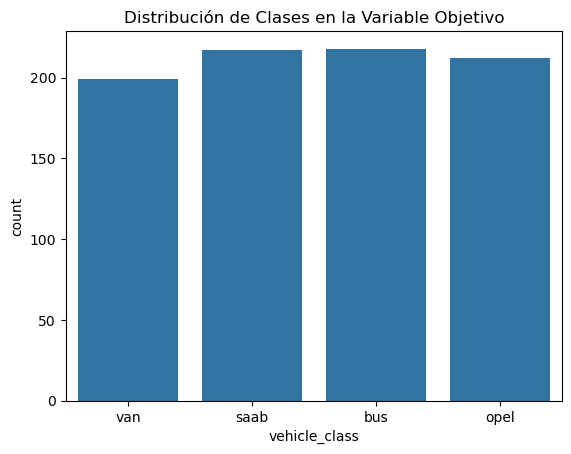

In [17]:
# Analizamos la distribución de la variable objetivo 'Target' para ver el balance de clases
sns.countplot(x="vehicle_class", data=datos)
plt.title("Distribución de Clases en la Variable Objetivo")

In [19]:
# 2. Preprocesamiento de Datos
# Separamos el dataset en las variables independientes (X) y la variable dependiente (y)
X = datos.drop("vehicle_class", axis=1)  # 'Target' es la columna objetivo
y = datos["vehicle_class"]

# 3 Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

Reporte de Clasificación:
              precision    recall  f1-score   support

         bus       0.95      0.96      0.95        77
        opel       0.50      0.38      0.43        65
        saab       0.51      0.47      0.49        57
         van       0.75      1.00      0.86        55

    accuracy                           0.71       254
   macro avg       0.68      0.70      0.68       254
weighted avg       0.69      0.71      0.70       254

Matriz de Confusión:
[[74  0  0  3]
 [ 3 25 26 11]
 [ 1 25 27  4]
 [ 0  0  0 55]]


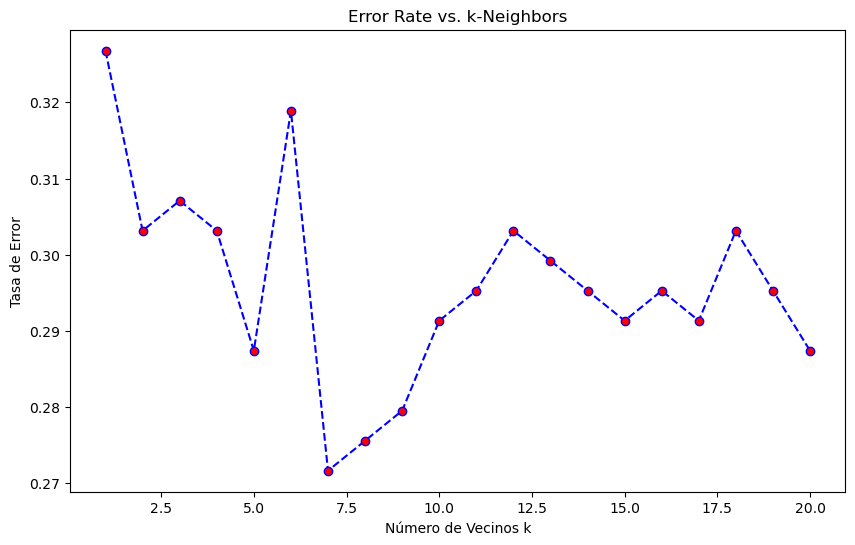

In [21]:
# Escalamos las características (features) para que tengan media 0 y desviación estándar 1
# Esto es importante para el k-NN porque se basa en distancias, y escalado asegura que cada variable contribuya de manera equitativa
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Ajustamos y transformamos el conjunto de entrenamiento
X_test = scaler.transform(X_test)        # Transformamos el conjunto de prueba

# 4. Entrenamiento del Modelo de k-Vecinos Más Cercanos
# Inicializamos el modelo con un número de vecinos (k) de ejemplo, por ejemplo, k=5
# Se pueden probar diferentes valores de k para encontrar el que mejor ajuste tenga
modelo_knn = KNeighborsClassifier(n_neighbors=5)

# Entrenamos el modelo con los datos de entrenamiento
modelo_knn.fit(X_train, y_train)

# 5. Predicción y Evaluación del Modelo
# Realizamos predicciones en el conjunto de prueba
predicciones = modelo_knn.predict(X_test)

# Evaluamos el rendimiento del modelo con un reporte de clasificación y una matriz de confusión
print("Reporte de Clasificación:")
print(classification_report(y_test, predicciones))

# Matriz de confusión para visualizar el rendimiento del modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, predicciones))

# 6. Optimización del Modelo con Diferentes Valores de k (opcional)
# Probamos diferentes valores de k y vemos cómo cambia la precisión en el conjunto de prueba
error_rate = []

# Probamos k desde 1 hasta 20 para ver cuál produce el mejor rendimiento
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test))  # Calculamos el porcentaje de errores

# Graficamos el error para cada valor de k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), error_rate, marker='o', linestyle='dashed', color='blue', markerfacecolor='red')
plt.title("Error Rate vs. k-Neighbors")
plt.xlabel("Número de Vecinos k")
plt.ylabel("Tasa de Error")
plt.show()


In [23]:
#Ejercicio

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Función de clasificación KNN
def knn_clasificacion2(datos, k=3):
    # Verificar que las columnas necesarias existen en el DataFrame
    if not {'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'}.issubset(datos.columns):
        raise ValueError("El DataFrame debe contener las columnas 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' y 'Species'")
    # Dividir los datos en variables independientes (X) y dependiente (y)
    X = datos[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
    y = datos['Species']
    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # Crear el modelo KNN
    model = KNeighborsClassifier(n_neighbors=k)
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    return model

In [29]:
data = pd.read_csv('iris.csv')  # Reemplaza 'iris.csv' con tu archivo de datos
modelo_knn = knn_clasificacion2(data, k=3)
 
# Estimaciones de clasificación para nuevas muestras
nuevas_muestras = pd.DataFrame({
    'SepalLengthCm': [5.1, 6.0, 4.4],
    'SepalWidthCm': [3.5, 2.9, 3.2],
    'PetalLengthCm': [1.4, 4.5, 1.3],
    'PetalWidthCm': [0.2, 1.5, 0.2]
})
 
estimaciones_clasificacion = modelo_knn.predict(nuevas_muestras)
print("Estimaciones de Clasificación:")
print(estimaciones_clasificacion)



Estimaciones de Clasificación:
['Iris-setosa' 'Iris-versicolor' 'Iris-setosa']


In [31]:
data.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa